In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# from matplotlib import colors

In [2]:
df = pd.read_csv("survey_results_public.csv", index_col="Respondent", usecols=["Respondent","MainBranch", "Country", "YearsCodePro", "ConvertedComp"]).dropna(how="any")
df["YearsCodePro"] = df["YearsCodePro"].str.replace('Less than 1 year','0')
df["YearsCodePro"] = df["YearsCodePro"].str.replace('More than 50 years','51')

df["MainBranch"] = df["MainBranch"].astype("category")
df["Country"] = df["Country"].astype("category")
df["YearsCodePro"] = df["YearsCodePro"].astype("int64")
df["ConvertedComp"] = df["ConvertedComp"].astype("int64")

df.sort_values(by="ConvertedComp", ascending=False, inplace=True)

df.head()

,MainBranch,Country,YearsCodePro,ConvertedComp
Respondent,,,,
75205,I am a developer by profession,United States,31,2000000
3848,I am a developer by profession,United States,1,2000000
6867,I am a developer by profession,United States,7,2000000
48825,I am a developer by profession,United States,5,2000000
37217,I am a developer by profession,United States,6,2000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55657 entries, 75205 to 11378
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MainBranch     55657 non-null  category
 1   Country        55657 non-null  category
 2   YearsCodePro   55657 non-null  int64   
 3   ConvertedComp  55657 non-null  int64   
dtypes: category(2), int64(2)
memory usage: 1.4 MB


In [4]:
filt=(df["ConvertedComp"].sort_values(ascending=False)>=10000) & (df["ConvertedComp"].sort_values(ascending=False)<=300000)
df_clean = df.loc[filt]
df_clean.head()

,MainBranch,Country,YearsCodePro,ConvertedComp
Respondent,,,,
40533,I am a developer by profession,United States,6,300000
40581,I am a developer by profession,United States,5,300000
33630,I am a developer by profession,United States,20,300000
67369,I am a developer by profession,United States,6,300000
18840,I am a developer by profession,United States,7,300000


In [5]:
df_list = df_clean.groupby(["Country", "MainBranch"]).size().to_frame(name='count').reset_index()
top_countries = df_list.groupby("Country").sum().sort_values(by="count", ascending=False).head(9)
lists = list(top_countries.index)
lists

['United States',
 'Germany',
 'United Kingdom',
 'Canada',
 'India',
 'France',
 'Poland',
 'Netherlands',
 'Australia']

In [9]:
df_1 = pd.DataFrame()
for i in range(0,len(lists)):
    data_1 = df_clean.groupby("Country").get_group(lists[i])
    df_1 = df_1.append(data_1)
df_1.head()

,MainBranch,Country,YearsCodePro,ConvertedComp
Respondent,,,,
40533,I am a developer by profession,United States,6,300000
40581,I am a developer by profession,United States,5,300000
33630,I am a developer by profession,United States,20,300000
67369,I am a developer by profession,United States,6,300000
18840,I am a developer by profession,United States,7,300000


<h1 style='color:red'>FUNCTIONS</h1>

In [13]:
def country_salary(df,list_, nrows, ncols):
    for i in range(0,nrows):
        for j in range(0,ncols):
            df_country = df.groupby("MainBranch").get_group("I am a developer by profession").groupby("Country").get_group(list_[i][j])
            ax[i,j].scatter(df_country["YearsCodePro"], df_country["ConvertedComp"], edgecolor='black', linewidth=1, alpha=0.75)
            ax[i,j].set_xlim([0, max(df_country["YearsCodePro"])*1.1])
            ax[i,j].set_ylim([0, max(df_country["ConvertedComp"])*1.1])
            ax[i,j].set_title(list_[i][j])
            ax[i,j].set_xlabel('experience')
            ax[i,j].set_ylabel('salary')

<h1 style='color:red'>GRAPH</h1>

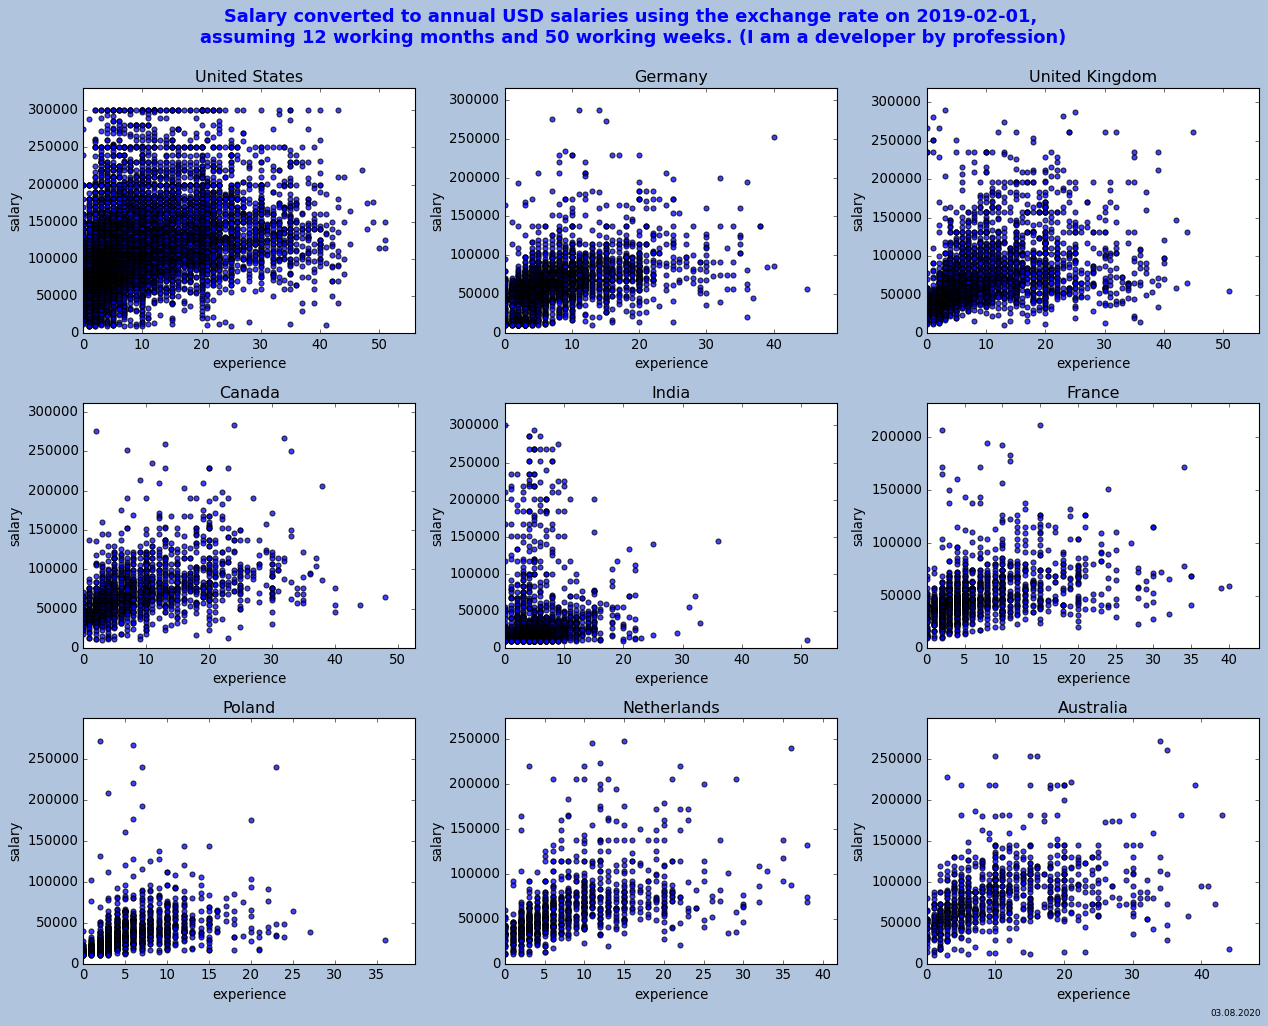

In [15]:
# %matplotlib inline
matplotlib.style.use('classic')

i=0
nested_list=[]
while i<len(lists):
  nested_list.append(lists[i:i+3])
  i+=3
nrows=len(nested_list)
ncols=len(nested_list[0])

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,12), facecolor='lightsteelblue')

country_salary(df_1, nested_list, nrows, ncols) #------function

fig.suptitle("Salary converted to annual USD salaries using the exchange rate on 2019-02-01, \nassuming 12 working months and 50 working weeks. (I am a developer by profession)", fontsize=16, color='b', weight='bold').set_position([.5, 1.05])
plt.figtext(0.99, -0.0, "03.08.2020", horizontalalignment='right', size=8, weight='light')
plt.tight_layout()
plt.show()